# Model Building

In [37]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data 
income_df = pd.read_csv(Path('Resources/clean_data.csv', index_col=False))
income_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# create feature matrix (X)
#selecting all columns except 'income'
X=income_df.drop('income', axis=1) 

# create response vector (y)
##selecting 'income'
y=income_df['income'].values 

In [5]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [6]:
# One-hot encoding the 'workclass' column creates 9 new columns, one for each category
pd.get_dummies(X['workclass'])

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,1,0,0,0,0


## Converting categorical to numeric

In [7]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)


,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 0, 0, 1])

In [9]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

## Scaling using standard scalar

In [10]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.90894294,  0.88870638, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.19050856, -0.66000898,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.63028916, -0.24294561,  1.90318504, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       ...,
       [-0.85017946, -0.80615511,  1.12727615, ..., -2.93434654,
        -0.04483956, -0.022173  ],
       [ 1.49531708,  0.74245653, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.41039886, -1.23397672,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ]])

In [11]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.71520738, -1.53731954, -2.36431386, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-1.50985037,  0.17110055, -1.20045052, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.996773  , -0.82483353,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       ...,
       [-0.7768827 , -0.77995253, -0.81249608, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [ 0.46916234, -0.03284403, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-1.4365536 ,  1.215046  , -0.03658719, ...,  0.34079138,
        -0.04483956, -0.022173  ]])

## Model score function using train data only

In [12]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("****************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("**********Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("************Confusion Matrix using cross_val_predict******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3, method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("************Area under the curve******************")
    print(roc_auc)


## Model score function using both train and test data 

In [13]:
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("****************Train Score******************")
    print(train_score)
    print()

    print("*****************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("************Area under the curve******************")
    print(roc_auc)
    


## Stochastic Gradent Descent Classifier

In [38]:
# Creating a sgd classifier model on the scaled data
sgd_clf=SGDClassifier(random_state=42, loss='log')

# Fit the model to the data
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

****************Train Score******************
0.8464373464373465

**********Using K=3 cross validation**********
[0.83869779 0.83869779 0.84054054]

************Confusion Matrix using cross_val_predict******************
[[16750  1667]
 [ 2257  3746]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18417
           1       0.69      0.62      0.66      6003

    accuracy                           0.84     24420
   macro avg       0.79      0.77      0.78     24420
weighted avg       0.83      0.84      0.84     24420


ROC Curve


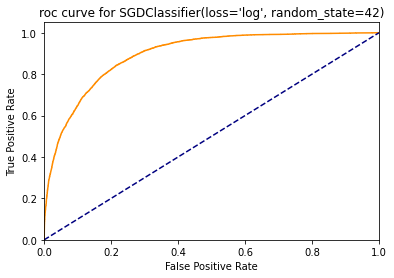


************Area under the curve******************
0.8951891359889186


In [39]:
#score for logistic regression using only training data
train_score(sgd_clf)

****************Train Score******************
0.8464373464373465

*****************Test Score******************
0.8506326004176391

************Confusion Matrix******************
[[5823  480]
 [ 736 1102]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6303
           1       0.70      0.60      0.64      1838

    accuracy                           0.85      8141
   macro avg       0.79      0.76      0.77      8141
weighted avg       0.84      0.85      0.85      8141


ROC Curve


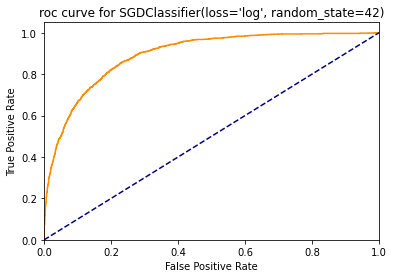


************Area under the curve******************
0.8938389184416907


In [40]:
#score for sgd classifier using  training and test data
test_score(sgd_clf)

## Logistic Regression

In [14]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

****************Train Score******************
0.8526208026208026

**********Using K=3 cross validation**********
[0.8522113  0.85159705 0.84643735]

************Confusion Matrix using cross_val_predict******************
[[17124  1293]
 [ 2368  3635]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     18417
           1       0.74      0.61      0.67      6003

    accuracy                           0.85     24420
   macro avg       0.81      0.77      0.78     24420
weighted avg       0.84      0.85      0.84     24420


ROC Curve


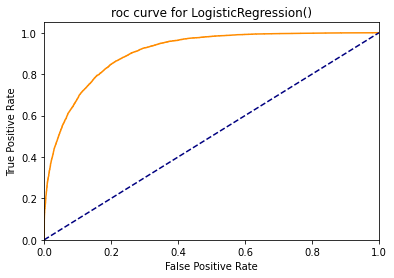


************Area under the curve******************
0.9061417690278858


In [15]:
#score for logistic regression using only training data
train_score(lr)

****************Train Score******************
0.8526208026208026

*****************Test Score******************
0.8555460017196904

************Confusion Matrix******************
[[5830  473]
 [ 703 1135]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6303
           1       0.71      0.62      0.66      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


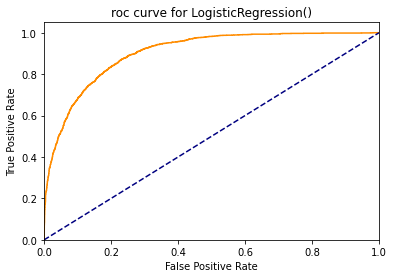


************Area under the curve******************
0.9033739913822406


In [16]:
#score for logistic regression using training and test data
test_score(lr)

### Tuning hyperparamaters  using Grid Search CV for Logistic Regresssion

In [23]:
#### Using GridSearchCV
param_grid_lr = {'C': [0.01,0.1,1, 5, 10],
              'penalty': ['l1','l2'],
             'solver':['lbfgs','saga'],
                'max_iter':[100,500,1000]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, verbose=1, n_jobs=-1)

In [24]:
grid_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga']},
             verbose=1)

In [25]:
# List the best parameters for this dataset
print(grid_lr.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [26]:
# List the best score
print(grid_lr.best_score_)

0.8507780507780508


In [27]:
#best estimator
lr_b=grid_lr.best_estimator_
lr_b

LogisticRegression(C=0.1, solver='saga')

****************Train Score******************
0.8533169533169533

*****************Test Score******************
0.8561601768824468

************Confusion Matrix******************
[[5833  470]
 [ 701 1137]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6303
           1       0.71      0.62      0.66      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


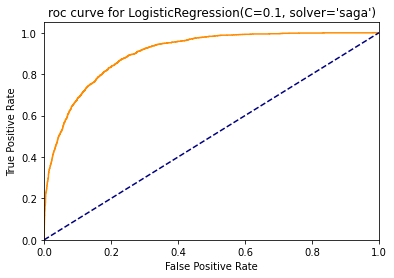


************Area under the curve******************
0.9038100757588705


In [30]:
#score for logistic regression using training and test data
test_score(lr_b)

### Tuning hyperparamaters  using Randomized Search CV for Logistic Regresssion

In [31]:
#### Using GridSearchCV
param_rand_lr = {'C': [0.01,0.1,1, 5, 10],
              'penalty': ['l1','l2'],
             'solver':['lbfgs','saga'],
                'max_iter':[100,500,1000]}
rand_lr = RandomizedSearchCV(lr, param_rand_lr, cv=3, verbose=1, n_jobs=-1)

In [32]:
rand_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 5, 10],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'saga']},
                   verbose=1)

In [33]:
# List the best parameters for this dataset
print(rand_lr.best_params_)

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}


In [34]:
# List the best score
print(rand_lr.best_score_)

0.8507780507780508


In [35]:
#best estimator
lr_R_b=rand_lr.best_estimator_
lr_R_b

LogisticRegression(C=0.1, penalty='l1', solver='saga')

****************Train Score******************
0.8525389025389025

*****************Test Score******************
0.855791671784793

************Confusion Matrix******************
[[5831  472]
 [ 702 1136]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6303
           1       0.71      0.62      0.66      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


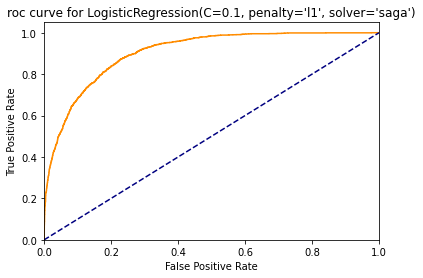


************Area under the curve******************
0.9045344661168827


In [36]:
#score for logistic regression using training and test data
test_score(lr_R_b)

## KNeighbors Classifier

In [41]:
# Creating a Kneighbors classifier model on the scaled data
knn= KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

****************Train Score******************
0.8928337428337428

**********Using K=3 cross validation**********
[0.81388206 0.81265356 0.80687961]

************Confusion Matrix using cross_val_predict******************
[[16392  2025]
 [ 2587  3416]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     18417
           1       0.63      0.57      0.60      6003

    accuracy                           0.81     24420
   macro avg       0.75      0.73      0.74     24420
weighted avg       0.81      0.81      0.81     24420


ROC Curve


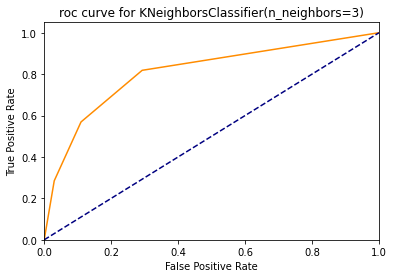


************Area under the curve******************
0.8083003167291126


In [42]:
#score for Kneighbors classifier using only training data
train_score(knn)

****************Train Score******************
0.8928337428337428

*****************Test Score******************
0.8182041518241002

************Confusion Matrix******************
[[5562  741]
 [ 739 1099]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6303
           1       0.60      0.60      0.60      1838

    accuracy                           0.82      8141
   macro avg       0.74      0.74      0.74      8141
weighted avg       0.82      0.82      0.82      8141


ROC Curve


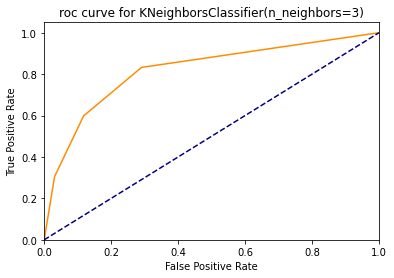


************Area under the curve******************
0.8175271737019368


In [43]:
#score for Kneighbors classifier using training and test data
test_score(knn)

k: 1, Train/Test Score: 1.000/0.799
k: 3, Train/Test Score: 0.893/0.818
k: 5, Train/Test Score: 0.874/0.826
k: 7, Train/Test Score: 0.864/0.829
k: 9, Train/Test Score: 0.857/0.829


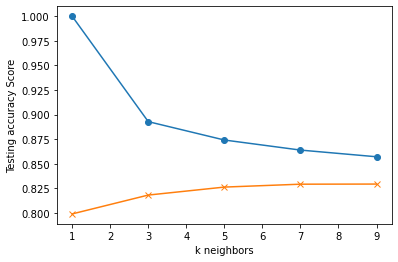

In [44]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    tra_score = knn.score(X_train_scaled, y_train)
    tes_score = knn.score(X_test_scaled, y_test)
    train_scores.append(tra_score)
    test_scores.append(tes_score)
    print(f"k: {k}, Train/Test Score: {tra_score:.3f}/{tes_score:.3f}")
    
#plotting knn scores
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [45]:
# Creating a Kneighbors classifier model on the scaled data
knn_5= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the data
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

****************Train Score******************
0.8741605241605241

*****************Test Score******************
0.826311263972485

************Confusion Matrix******************
[[5629  674]
 [ 740 1098]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6303
           1       0.62      0.60      0.61      1838

    accuracy                           0.83      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.83      0.83      8141


ROC Curve


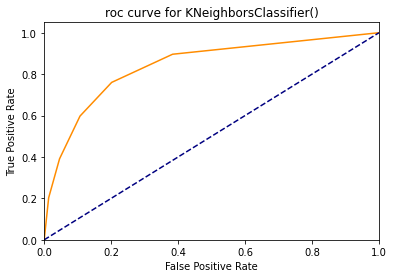


************Area under the curve******************
0.8405731367535401


In [46]:
#score for Kneighbors classifier using training and test data
test_score(knn_5)

### Tuning hyperparamaters  using Grid Search CV for knn

In [47]:
#### Using GridSearchCV
param_grid_knn = {'weights': ['uniform','distance'],
              'algorithm': ['auto','ball_tree', 'kd_tree'],
             'n_neighbors':[1,5,8,10]}
grid_knn = GridSearchCV(knn_5, param_grid_knn, verbose=4, n_jobs=-1)

In [48]:
grid_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [49]:
# List the best parameters for this dataset
print(grid_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}


In [50]:
# List the best score
print(grid_knn.best_score_)

0.824037674037674


In [51]:
#best estimator
knn_b=grid_knn.best_estimator_
knn_b

KNeighborsClassifier(n_neighbors=8)

****************Train Score******************
0.8578214578214578

*****************Test Score******************
0.833681365925562

************Confusion Matrix******************
[[5827  476]
 [ 878  960]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6303
           1       0.67      0.52      0.59      1838

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.83      8141


ROC Curve


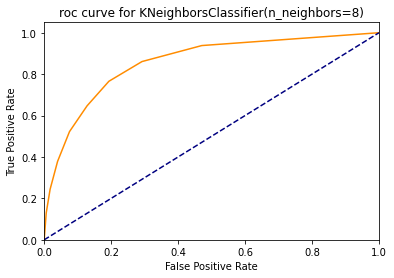


************Area under the curve******************
0.8561643185266633


In [52]:
#score for logistic regression using training and test data
test_score(knn_b)

### Tuning hyperparamaters  using Randomized Search CV for knn

In [54]:
#### Using GridSearchCV
param_rand_knn = {'weights': ['uniform','distance'],
              'algorithm': ['auto','ball_tree', 'kd_tree'],
             'n_neighbors':[1,5,8,10]}
rand_knn = RandomizedSearchCV(knn_5, param_rand_knn, cv=3, verbose=4, n_jobs=-1)

In [55]:
rand_knn.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': [1, 5, 8, 10],
                                        'weights': ['uniform', 'distance']},
                   verbose=4)

In [60]:
# List the best parameters for this dataset
#print(rand_knn.best_params_)

In [56]:
# List the best score
print(rand_knn.best_score_)

0.8257166257166256


In [57]:
#best estimator
knn_R_b=rand_knn.best_estimator_
knn_R_b

KNeighborsClassifier(n_neighbors=10)

****************Train Score******************
0.8547502047502048

*****************Test Score******************
0.8326986856651517

************Confusion Matrix******************
[[5799  504]
 [ 858  980]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6303
           1       0.66      0.53      0.59      1838

    accuracy                           0.83      8141
   macro avg       0.77      0.73      0.74      8141
weighted avg       0.82      0.83      0.83      8141


ROC Curve


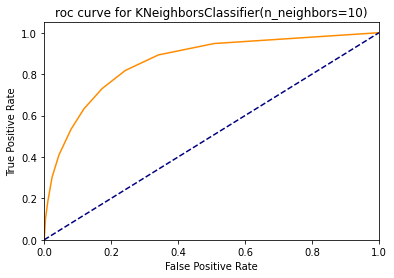


************Area under the curve******************
0.8590040461241231


In [58]:
#score for logistic regression using training and test data
test_score(knn_R_b)

## Support Vector Classifier

In [149]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [150]:
#score for support vector classifier using only training data
#train_score(svc)

****************Train Score******************
0.8515561015561015

*****************Test Score******************
0.8553003316545879

************Confusion Matrix******************
[[5863  440]
 [ 738 1100]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6303
           1       0.71      0.60      0.65      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


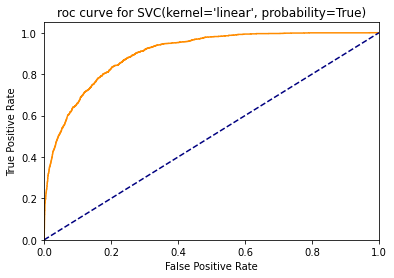


************Area under the curve******************
0.9010521787213958


In [151]:
#score for support vector classifier using training and test data
test_score(svc)

### Tuning hyperparamaters  using Randomized Search CV for SVC

In [152]:
#### Using GridSearchCV
param_rand_svc ={
              'C': [1.0,2.0],
                'kernel':['linear', 'poly','rbf'],
                'gamma':['auto','scale']}
rand_svc = RandomizedSearchCV(svc, param_rand_svc, cv=3, verbose=4, n_jobs=-1)

In [153]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..C=1.0, gamma=auto, kernel=linear;, score=0.851 total time= 4.0min
[CV 3/3] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.845 total time= 3.6min
[CV 3/3] END .C=2.0, gamma=scale, kernel=linear;, score=0.846 total time= 5.0min
[CV 2/3] END ..C=1.0, gamma=auto, kernel=linear;, score=0.852 total time= 4.0min
[CV 1/3] END ....C=2.0, gamma=scale, kernel=rbf;, score=0.843 total time= 3.5min
[CV 1/3] END .C=2.0, gamma=scale, kernel=linear;, score=0.851 total time= 5.0min
[CV 1/3] END ...C=1.0, gamma=scale, kernel=poly;, score=0.828 total time= 3.4min
[CV 1/3] END .....C=1.0, gamma=auto, kernel=rbf;, score=0.847 total time= 3.6min
[CV 3/3] END ....C=2.0, gamma=scale, kernel=rbf;, score=0.844 total time= 3.7min
[CV 1/3] END ....C=2.0, gamma=auto, kernel=poly;, score=0.831 total time= 2.9min
[CV 3/3] END ...C=1.0, gamma=scale, kernel=poly;, score=0.821 total time= 3.4min
[CV 3/3] END .....C=2.0, gamma=auto, kernel=rbf;

RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear', probability=True),
                   n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=4)

In [158]:
# List the best parameters for this dataset
print(rand_svc.best_params_)

{'kernel': 'linear', 'gamma': 'auto', 'C': 1.0}
[CV 3/3] END ..C=1.0, gamma=auto, kernel=linear;, score=0.846 total time= 3.9min
[CV 2/3] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.847 total time= 3.6min
[CV 2/3] END .C=2.0, gamma=scale, kernel=linear;, score=0.852 total time= 5.0min
[CV 3/3] END ....C=2.0, gamma=auto, kernel=poly;, score=0.825 total time= 2.2min


In [155]:
# List the best score
print(rand_svc.best_score_)

0.8498771498771499


In [156]:
#best estimator
svc_R_b=rand_svc.best_estimator_
svc_R_b

SVC(gamma='auto', kernel='linear', probability=True)

****************Train Score******************
0.8515561015561015

*****************Test Score******************
0.8553003316545879

************Confusion Matrix******************
[[5863  440]
 [ 738 1100]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6303
           1       0.71      0.60      0.65      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


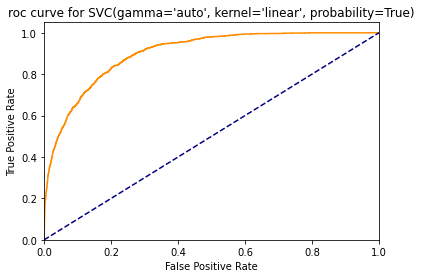


************Area under the curve******************
0.9010446689548148


In [157]:
#score for logistic regression using training and test data
test_score(svc_R_b)

## Decision Tree Classifier

In [64]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.81547912 0.81093366 0.81437346]

************Confusion Matrix using cross_val_predict******************
[[16085  2332]
 [ 2274  3729]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     18417
           1       0.62      0.62      0.62      6003

    accuracy                           0.81     24420
   macro avg       0.75      0.75      0.75     24420
weighted avg       0.81      0.81      0.81     24420


ROC Curve


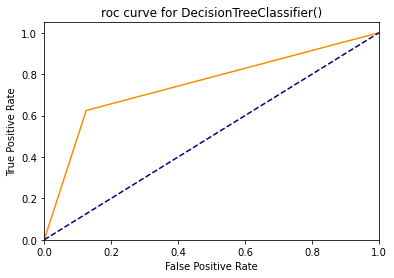


************Area under the curve******************
0.7495738881930051


In [65]:
#score for Decision Tree using only training data
train_score(dt)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8193096671170618

************Confusion Matrix******************
[[5500  803]
 [ 668 1170]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6303
           1       0.59      0.64      0.61      1838

    accuracy                           0.82      8141
   macro avg       0.74      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141


ROC Curve


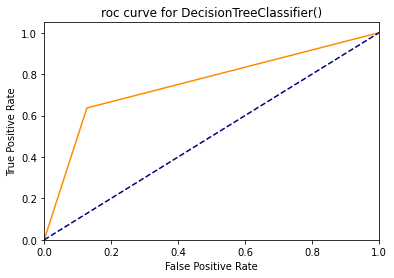


************Area under the curve******************
0.7545809144547814


In [66]:
#score for Decision Tree using training and test data
test_score(dt)

[9.95082056e-02 1.76365181e-01 1.15122193e-01 1.06688196e-01
 3.98191983e-02 6.37421402e-02 1.76581881e-03 2.99050380e-03
 6.39591942e-03 0.00000000e+00 9.29986670e-03 5.92443593e-03
 7.27039618e-03 4.26642863e-03 0.00000000e+00 4.22061714e-04
 7.78182447e-04 2.36703042e-04 3.03744969e-05 2.81679875e-04
 5.77933833e-05 4.46956869e-04 1.39635025e-03 3.64560386e-03
 1.80470397e-03 3.75495403e-04 4.50782350e-03 2.72754396e-03
 2.14953896e-04 1.09994536e-03 2.99549777e-03 1.40546764e-03
 4.75736532e-04 2.01743074e-01 9.62277638e-04 2.98177664e-03
 6.32909184e-04 1.28034335e-03 8.61749065e-04 6.73925792e-03
 0.00000000e+00 7.79414973e-03 9.63737283e-03 2.64533425e-03
 3.35524096e-03 6.16491439e-03 5.33638484e-03 1.76724345e-04
 6.74793640e-03 3.57398763e-03 9.91145365e-03 4.92628453e-03
 6.55203220e-03 2.64953839e-03 3.18140102e-03 6.86611810e-04
 1.07202636e-03 7.13199205e-04 4.81581195e-03 1.51454391e-03
 2.21981378e-03 3.80105748e-03 9.37459651e-04 4.44998678e-03
 3.32135909e-03 5.452890

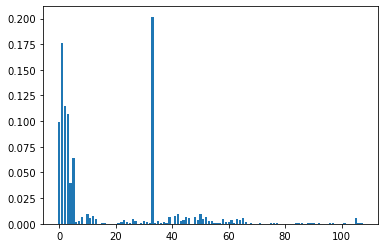

In [67]:
# plotting columns with its importances
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for Decision Tree

In [104]:
#### Using GridSearchCV
param_grid_dt = {
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=1, n_jobs=-1)

In [105]:
grid_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000]},
             verbose=1)

In [89]:
# List the best parameters for this dataset
print(grid_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 10000, 'max_features': 'auto', 'min_samples_leaf': 10}


In [90]:
# List the best score
print(grid_dt.best_score_)

0.8403767403767404


In [91]:
#best estimator
dt_b=grid_dt.best_estimator_
dt_b

DecisionTreeClassifier(criterion='entropy', max_depth=10000,
                       max_features='auto', min_samples_leaf=10)

****************Train Score******************
0.8475020475020475

*****************Test Score******************
0.8459648691806904

************Confusion Matrix******************
[[5824  479]
 [ 775 1063]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6303
           1       0.69      0.58      0.63      1838

    accuracy                           0.85      8141
   macro avg       0.79      0.75      0.77      8141
weighted avg       0.84      0.85      0.84      8141


ROC Curve


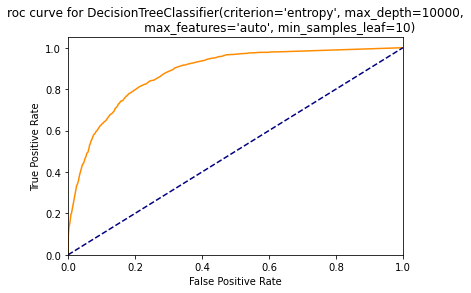


************Area under the curve******************
0.8799089056681819


In [92]:
#score for logistic regression using training and test data
test_score(dt_b)

### Tuning hyperparamaters  using Randomized Search CV for Decision Tree

In [93]:
#### Using GridSearchCV
param_rand_dt ={
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_dt = RandomizedSearchCV(dt, param_rand_dt, cv=3, verbose=4, n_jobs=-1)

In [94]:
rand_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000]},
                   verbose=4)

In [95]:
# List the best parameters for this dataset
print(rand_dt.best_params_)

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}


In [96]:
# List the best score
print(rand_dt.best_score_)

0.8291973791973793


In [97]:
#best estimator
dt_R_b=rand_dt.best_estimator_
dt_R_b

DecisionTreeClassifier(max_depth=10, max_features='auto')

****************Train Score******************
0.8457411957411958

*****************Test Score******************
0.8421569831716006

************Confusion Matrix******************
[[6023  280]
 [1005  833]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      6303
           1       0.75      0.45      0.56      1838

    accuracy                           0.84      8141
   macro avg       0.80      0.70      0.73      8141
weighted avg       0.83      0.84      0.83      8141


ROC Curve


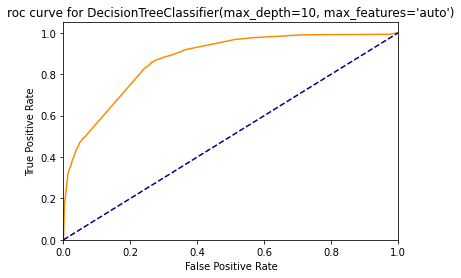


************Area under the curve******************
0.8706560963680869


In [98]:
#score for logistic regression using training and test data
test_score(dt_R_b)

## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [108]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.85380835 0.85135135 0.84643735]

************Confusion Matrix using cross_val_predict******************
[[17039  1378]
 [ 2216  3787]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     18417
           1       0.73      0.63      0.68      6003

    accuracy                           0.85     24420
   macro avg       0.81      0.78      0.79     24420
weighted avg       0.85      0.85      0.85     24420


ROC Curve


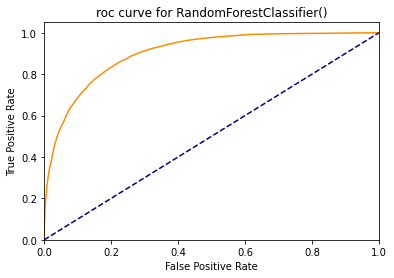


************Area under the curve******************
0.9021699716466358


In [109]:
#score for Random Forest Classifer using only training data
train_score(rf)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8605822380542931

************Confusion Matrix******************
[[5839  464]
 [ 671 1167]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6303
           1       0.72      0.63      0.67      1838

    accuracy                           0.86      8141
   macro avg       0.81      0.78      0.79      8141
weighted avg       0.86      0.86      0.86      8141


ROC Curve


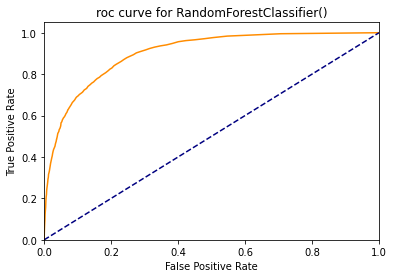


************Area under the curve******************
0.9020551209961507


In [110]:
#score for Random Forest Classifer using training and test data
test_score(rf)

[1.49771590e-01 1.56383983e-01 6.32943761e-02 9.37016515e-02
 3.07765499e-02 8.14084959e-02 2.01815024e-03 4.93500103e-03
 5.83055889e-03 5.78849065e-06 1.08499438e-02 6.07705080e-03
 8.49802681e-03 5.00510247e-03 3.95504994e-05 1.54868190e-03
 1.71112135e-03 7.76148460e-04 2.30017403e-04 7.03616033e-04
 2.32596036e-03 1.53194020e-03 2.43399843e-03 3.18429516e-03
 1.36544565e-02 3.75022065e-03 7.65989867e-03 8.11087280e-03
 7.22177842e-05 5.44347815e-03 5.71782316e-03 6.73167056e-03
 3.18885449e-04 6.60533406e-02 8.19977714e-04 2.00250382e-02
 1.63051083e-03 1.76263277e-03 1.91473296e-03 5.75005183e-03
 1.35689944e-05 6.76901732e-03 1.88306757e-02 4.02873768e-03
 3.41660975e-03 4.16853270e-03 7.31862218e-03 1.31857573e-04
 1.35599722e-02 3.28412931e-03 7.19268282e-03 4.72977535e-03
 4.63401511e-03 3.89890034e-02 1.14184632e-02 1.82769061e-03
 1.03714486e-02 4.76714945e-03 1.20089320e-02 1.41371754e-03
 3.12558189e-03 4.96698663e-03 7.75465580e-04 6.78520349e-03
 1.02095136e-02 8.155301

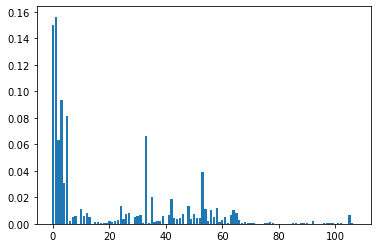

In [111]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for Random Forest

In [118]:
#### Using GridSearchCV
param_grid_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, verbose=1, n_jobs=-1)

In [119]:
grid_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [120]:
# List the best parameters for this dataset
print(grid_rf.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 100}


In [121]:
# List the best score
print(grid_rf.best_score_)

0.85995085995086


In [122]:
#best estimator
rf_b=grid_rf.best_estimator_
rf_b

RandomForestClassifier(max_depth=100, min_samples_leaf=5)

****************Train Score******************
0.8767813267813268

*****************Test Score******************
0.8672153298120624

************Confusion Matrix******************
[[5951  352]
 [ 729 1109]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6303
           1       0.76      0.60      0.67      1838

    accuracy                           0.87      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.86      0.87      0.86      8141


ROC Curve


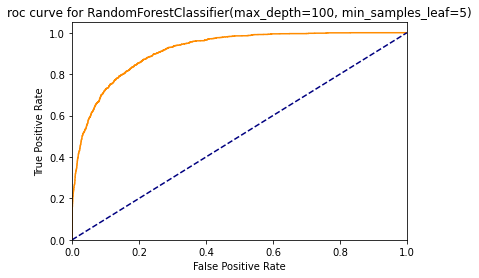


************Area under the curve******************
0.9148912542639506


In [123]:
#score for logistic regression using training and test data
test_score(rf_b)

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [112]:
#### Using GridSearchCV
param_rand_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rf = RandomizedSearchCV(rf, param_rand_rf, cv=3, verbose=1, n_jobs=-1)

In [113]:
rand_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [114]:
# List the best parameters for this dataset
print(rand_rf.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'gini'}


In [115]:
# List the best score
print(rand_rf.best_score_)

0.8494266994266995


In [116]:
#best estimator
rf_R_b=rand_rf.best_estimator_
rf_R_b

RandomForestClassifier(max_depth=100, max_features='log2', n_estimators=500)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8584940425009213

************Confusion Matrix******************
[[5819  484]
 [ 668 1170]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6303
           1       0.71      0.64      0.67      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.78      0.79      8141
weighted avg       0.85      0.86      0.86      8141


ROC Curve


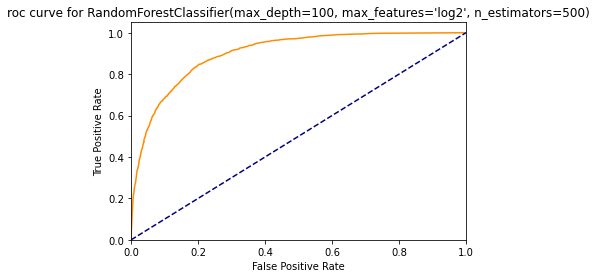


************Area under the curve******************
0.9011574449322629


In [117]:
#score for logistic regression using training and test data
test_score(rf_R_b)

## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [124]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.83415233 0.82862408 0.82751843]

************Confusion Matrix using cross_val_predict******************
[[16622  1795]
 [ 2374  3629]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18417
           1       0.67      0.60      0.64      6003

    accuracy                           0.83     24420
   macro avg       0.77      0.75      0.76     24420
weighted avg       0.82      0.83      0.83     24420


ROC Curve


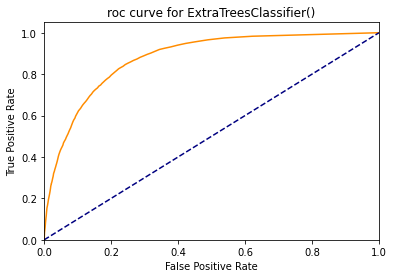


************Area under the curve******************
0.8778499340581469


In [125]:
#score for Extremely Random Trees using only training data
train_score(rt)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.836752241739344

************Confusion Matrix******************
[[5692  611]
 [ 718 1120]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6303
           1       0.65      0.61      0.63      1838

    accuracy                           0.84      8141
   macro avg       0.77      0.76      0.76      8141
weighted avg       0.83      0.84      0.83      8141


ROC Curve


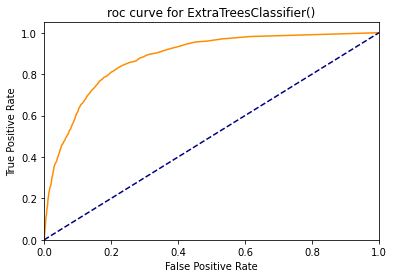


************Area under the curve******************
0.8782749272027397


In [126]:
#score for Extremely Random Trees using training and test data
test_score(rt)

[1.46180855e-01 1.61598588e-01 3.37305267e-02 6.46898725e-02
 2.16106979e-02 9.03579899e-02 1.71716374e-03 5.23827025e-03
 5.74536198e-03 4.70594997e-06 1.02196486e-02 6.95723306e-03
 8.67937569e-03 5.12406190e-03 5.71522522e-05 2.26750930e-03
 2.75969763e-03 1.12314812e-03 3.56448507e-04 8.86601121e-04
 3.40250279e-03 1.68315786e-03 2.93174872e-03 3.53367081e-03
 1.83873762e-02 4.80274966e-03 1.04348568e-02 1.41427707e-02
 5.64369443e-05 7.63231782e-03 6.80660457e-03 6.46547328e-03
 3.27444626e-04 7.56008036e-02 1.02198335e-03 2.54342894e-02
 1.89526333e-03 2.03758902e-03 2.04238847e-03 5.05584972e-03
 2.85773770e-05 5.75329838e-03 2.34992973e-02 4.00314176e-03
 3.69877880e-03 3.80735943e-03 8.62117819e-03 1.82009519e-04
 1.93329082e-02 2.61375339e-03 6.26218911e-03 4.39943673e-03
 4.04971628e-03 3.54583677e-02 1.29412880e-02 2.04905347e-03
 1.42854447e-02 4.37387458e-03 1.38310381e-02 1.70382966e-03
 3.31558565e-03 5.15369950e-03 1.15019936e-03 7.00225562e-03
 1.02733482e-02 1.019293

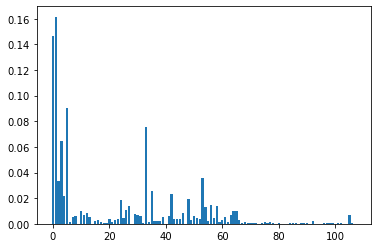

In [127]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for Extremely Random Tree

In [134]:
#### Using GridSearchCV
param_grid_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rt = GridSearchCV(rt, param_grid_rt, cv=3, verbose=1, n_jobs=-1)

In [135]:
grid_rt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 100, 1000, 10000],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [136]:
# List the best parameters for this dataset
print(grid_rt.best_params_)

{'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 200}


In [137]:
# List the best score
print(grid_rt.best_score_)

0.8366912366912368


In [138]:
#best estimator
rt_b=grid_rt.best_estimator_
rt_b

ExtraTreesClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=10,
                     n_estimators=200)

****************Train Score******************
0.8439803439803439

*****************Test Score******************
0.8433853334971134

************Confusion Matrix******************
[[5861  442]
 [ 833 1005]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6303
           1       0.69      0.55      0.61      1838

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.84      8141


ROC Curve


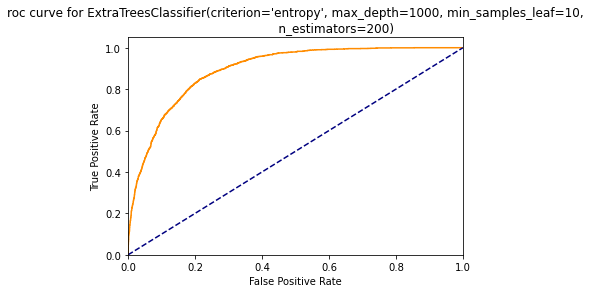


************Area under the curve******************
0.8941917911518376


In [139]:
#score for logistic regression using training and test data
test_score(rt_b)

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [128]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(rt, param_rand_rt, cv=3, verbose=1, n_jobs=-1)

In [129]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [130]:
# List the best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10000, 'criterion': 'entropy'}


In [131]:
# List the best score
print(rand_rt.best_score_)

0.8362817362817362


In [132]:
#best estimator
rt_R_b=rand_rt.best_estimator_
rt_R_b

ExtraTreesClassifier(criterion='entropy', max_depth=10000, min_samples_leaf=10,
                     n_estimators=500)

****************Train Score******************
0.8439803439803439

*****************Test Score******************
0.8426483233018057

************Confusion Matrix******************
[[5853  450]
 [ 831 1007]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6303
           1       0.69      0.55      0.61      1838

    accuracy                           0.84      8141
   macro avg       0.78      0.74      0.76      8141
weighted avg       0.83      0.84      0.84      8141


ROC Curve


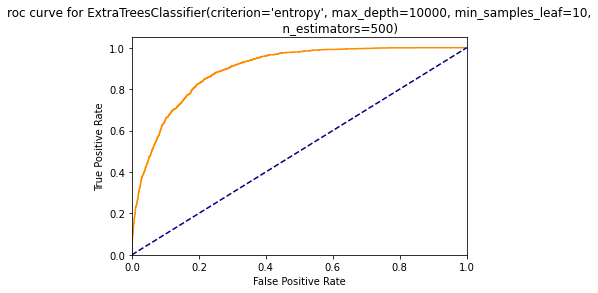


************Area under the curve******************
0.8942847568829602


In [133]:
#score for logistic regression using training and test data
test_score(rt_R_b)

## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [167]:
# Creating a Logistic Regression model on the scaled data
ab= AdaBoostClassifier(base_estimator = dt)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.82555283 0.81105651 0.81314496]

************Confusion Matrix using cross_val_predict******************
[[16218  2199]
 [ 2286  3717]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     18417
           1       0.63      0.62      0.62      6003

    accuracy                           0.82     24420
   macro avg       0.75      0.75      0.75     24420
weighted avg       0.82      0.82      0.82     24420


ROC Curve


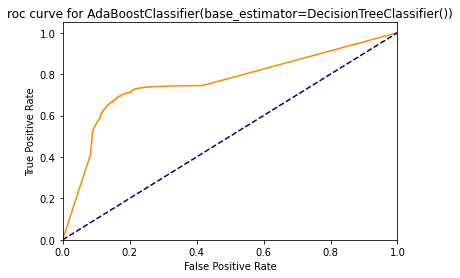


************Area under the curve******************
0.7607217323086298


In [168]:
#score for logistic regression using only training data
train_score(ab)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8363837366416902

************Confusion Matrix******************
[[5663  640]
 [ 692 1146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6303
           1       0.64      0.62      0.63      1838

    accuracy                           0.84      8141
   macro avg       0.77      0.76      0.76      8141
weighted avg       0.83      0.84      0.84      8141


ROC Curve


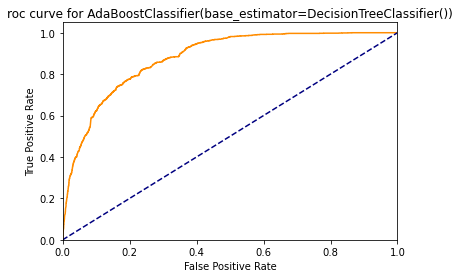


************Area under the curve******************
0.8789099340746076


In [169]:
#score for logistic regression using training and test data
test_score(ab)

[5.86154371e-02 3.67456551e-01 5.99462495e-04 5.11334035e-02
 1.58987175e-02 6.58012592e-02 5.57209133e-04 1.94410929e-03
 1.91125452e-03 0.00000000e+00 1.52814550e-03 1.92347636e-03
 2.93920597e-03 1.64079348e-03 1.00020876e-05 1.50928352e-04
 1.93200191e-04 1.42832596e-04 2.23077857e-05 1.41108592e-04
 1.62038534e-04 1.53442777e-04 9.75283571e-04 1.23328906e-03
 1.29097928e-03 4.02864261e-04 1.58192829e-03 8.95637418e-04
 1.27423617e-05 4.51960747e-04 1.88561544e-03 1.21225692e-03
 1.16050635e-04 5.66133939e-02 3.59928548e-04 1.02109563e-03
 4.70593185e-04 6.21009972e-04 4.18859656e-04 3.47948600e-03
 0.00000000e+00 4.89651843e-03 6.55692457e-03 1.75709249e-03
 2.04310559e-03 3.22942630e-03 2.21663365e-03 2.83598705e-05
 4.26857372e-03 1.56567869e-03 4.49738489e-03 2.81545050e-03
 3.32528625e-03 2.94750564e-03 1.24212735e-03 3.24797237e-04
 5.67492039e-04 7.09735764e-04 1.59575540e-02 5.31472900e-04
 7.61649620e-04 9.96200229e-04 2.08829748e-04 1.16864690e-03
 3.78669297e-03 5.349326

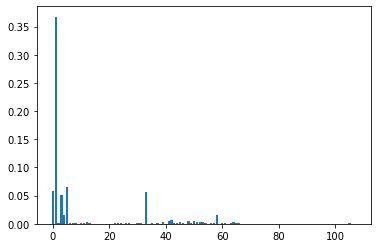

In [170]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for AdaBoostClassifier

In [187]:
#### Using GridSearchCV
param_rand_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.1,0.2,0.5]}
rand_ab = RandomizedSearchCV(ab, param_rand_ab, cv=3, verbose=1, n_jobs=-1)

In [188]:
rand_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000, 5000]},
                   verbose=1)

In [189]:
# List the best parameters for this dataset
print(rand_ab.best_params_)

{'n_estimators': 500, 'learning_rate': 0.1}


In [190]:
# List the best score
print(rand_ab.best_score_)

0.8202293202293202


In [191]:
#best estimator
ab_R_b=rand_ab.best_estimator_
ab_R_b

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=500)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8352782213487286

************Confusion Matrix******************
[[5626  677]
 [ 664 1174]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6303
           1       0.63      0.64      0.64      1838

    accuracy                           0.84      8141
   macro avg       0.76      0.77      0.76      8141
weighted avg       0.84      0.84      0.84      8141


ROC Curve


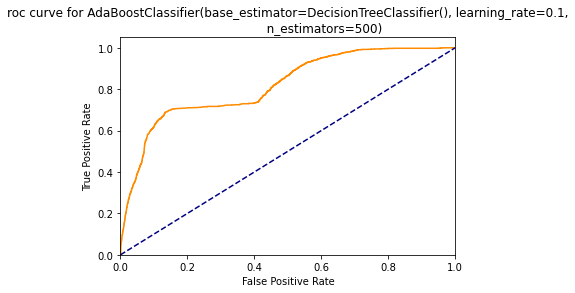


************Area under the curve******************
0.8185419417010777


In [192]:
#score for logistic regression using training and test data
test_score(ab_R_b)

In [186]:
def model_tester(model, X_train_scaled, X_test_scaled,y_train, y_test):
    clf = model.fit(X_train_scaled, y_train)
    y_pred=clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    print ('*'*40)
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6303
           1       0.75      0.64      0.69      1838

    accuracy                           0.87      8141
   macro avg       0.82      0.79      0.80      8141
weighted avg       0.86      0.87      0.87      8141

Training Score: 0.8665438165438165
Testing Score: 0.8694263603979855
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6303
           1       0.75      0.65      0.69      1838

    accuracy                           0.87      8141
   macro avg       0.83      0.79      0.81      8141
weighted avg       0.87      0.87      0.87      8141

Training Score: 0.8689189189189189
Testing Score: 0.8712688858862547
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6303
           1       0.75      0.57      0.65      1838

    accuracy                           0.86 

## Trying to improve score by selecting important features based on Adaboster Classifier


In [171]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))

In [172]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [173]:
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X_dummies), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [174]:
#before model selection
print(f'Training Score: {sgd_clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {sgd_clf.score(X_test_scaled, y_test)}')

Training Score: 0.8464373464373465
Testing Score: 0.8506326004176391


In [175]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {sgd_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {sgd_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8433251433251433
Testing Score: 0.8417884780739467


### Logistic Regression after selecting important features

In [176]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.8526208026208026
Testing Score: 0.8555460017196904


In [177]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8434479934479935
Testing Score: 0.8435081685296647


### KNeighborsClassifier after selecting important features

In [178]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.8571253071253071
Testing Score: 0.8293821397862671


In [179]:
#after model selection
knn_s=KNeighborsClassifier(n_neighbors=3).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.901064701064701
Testing Score: 0.831101830241985


### SVC after selecting important features

In [180]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.8515561015561015
Testing Score: 0.8553003316545879


In [181]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8434889434889435
Testing Score: 0.8467018793759981


### Decision Tree after selecting important features

In [182]:
#before model selection
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

Training Score: 0.9999590499590499
Testing Score: 0.8193096671170618


In [183]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9994266994266994
Testing Score: 0.810711214838472


### Random Forest after selecting important features

In [184]:
#before model selection
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

Training Score: 0.9999590499590499
Testing Score: 0.8605822380542931


In [185]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9994266994266994
Testing Score: 0.8533349711337673


## Real and predicted value using different model

In [195]:
#Predected value
y_pred_sgd=sgd_clf.predict(X_test_scaled)
y_pred_lr=lr.predict(X_test_scaled)
y_pred_knn=knn.predict(X_test_scaled)
y_pred_svc=svc.predict(X_test_scaled)
y_pred_dt=dt.predict(X_test_scaled)
y_pred_rf=rf.predict(X_test_scaled)
y_pred_rt=rt.predict(X_test_scaled)
y_pred_ab=ab.predict(X_test_scaled)

In [199]:
df_pred=pd.DataFrame({'Real income':y_test,
                     'sgd classifier':y_pred_sgd,
                     'logistic Regression':y_pred_lr,
                     'knn':y_pred_lr,
                     'svc':y_pred_svc,
                     'Decision Tree':y_pred_dt,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_rt,
                     'Ada Boost':y_pred_ab})
df_pred.replace({1:'>50K', 0: '<=50K'}, inplace=True)
df_pred

,Real income,sgd classifier,logistic Regression,knn,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
0,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
1,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
2,>50K,>50K,>50K,>50K,>50K,>50K,>50K,<=50K,>50K
3,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K
4,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...
8136,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,>50K,>50K,<=50K
8137,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
8138,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K,<=50K
8139,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
